# **Indian Start-up Funding Analysis (2018 - 2021)**

## Importing all necessary modules

In [1]:
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import numpy as np
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings. filterwarnings('ignore')

## **Data Loading**

### loading from csv files

In [2]:
# Loading 2018 funds data
data_2018 = pd.read_csv('data\startup_funding2018.csv')

# Data preview
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [3]:
# Loading 2019 funds data
data_2019 = pd.read_csv('data\startup_funding2019.csv')

# Data preview
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


### Loading from the database

In [5]:
# Loading environment variables from .env file
environment_variables = dotenv_values('.env')

# Getting the values for the credentials set in the .env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

# Creating a connection string
connection_string = f"DRIVER={{SQL Server}}; \
                    SERVER={server}; \
                    DATABASE={database}; \
                    UID={username}; \
                    PWD={password};"

# Connecting to the server
connection = pyodbc.connect(connection_string)

In [6]:
# Loading 2020 funds data
data_2020 = pd.read_sql_query(
    "SELECT * FROM LP1_startup_funding2020", connection)

# Saving the DataFrame to a CSV file
data_2020.to_csv('data/startup_funding2020.csv', index=False)

data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [7]:
# Loading 2021 funds data
data_2021 = pd.read_sql_query(
    "SELECT * FROM LP1_startup_funding2021", connection)

# Saving the DataFrame to a CSV file
data_2021.to_csv('data/startup_funding2021.csv', index=False)

# Data preview
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


## **Data information**

In [8]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [9]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [10]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [11]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [12]:
data_2018.shape, data_2019.shape, data_2020.shape, data_2021.shape

((526, 6), (89, 9), (1055, 10), (1209, 9))

## **Merging**

In [13]:
def standardize_column_names(df):
    # Creating a mapping based on common patterns found in the column names
    df.columns = [re.sub(r'(?i)^Company.*Name$', 'Company_Brand', col)
                  for col in df.columns]
    df.columns = [re.sub(r'(?i)^Amount.*$', 'Amount', col)
                  for col in df.columns]
    df.columns = [re.sub(r'(?i)^What.*does$', 'What_it_does', col)
                  for col in df.columns]
    df.columns = [re.sub(r'(?i)^Industry$', 'Sector', col)
                  for col in df.columns]
    df.columns = [re.sub(r'(?i)^Round.*Series$', 'Stage', col)
                  for col in df.columns]
    df.columns = [re.sub(r'(?i)^Location$', 'HeadQuarter', col)
                  for col in df.columns]
    df.columns = [re.sub(r'(?i)^About.*Company$', 'What_it_does', col)
                  for col in df.columns]
    return df


# Applying the function to standardize names
data_2018 = standardize_column_names(data_2018)
data_2019 = standardize_column_names(data_2019)
data_2020 = standardize_column_names(data_2020)
data_2021 = standardize_column_names(data_2021)

# Ensuring all DataFrames have the same set of columns
columns = ['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
           'Founders', 'Investor', 'Amount', 'Stage', 'Fund_Year',]

# Adding a new column 'Fund_Year' to each DataFrame
data_2018['Fund_Year'] = 2018
data_2019['Fund_Year'] = 2019
data_2020['Fund_Year'] = 2020
data_2021['Fund_Year'] = 2021

data_2018 = data_2018.reindex(columns=columns, fill_value=None)
data_2019 = data_2019.reindex(columns=columns)
data_2020 = data_2020.reindex(columns=columns)
data_2021 = data_2021.reindex(columns=columns)

# Merging all DataFrames
data = pd.concat([data_2018, data_2019, data_2020,
                 data_2021], ignore_index=True)

# Saving the DataFrame to a CSV file
data.to_csv('data/startup_funding_merged.csv', index=False)

# info of the combined DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2790 non-null   object 
 1   Founded        2110 non-null   float64
 2   HeadQuarter    2765 non-null   object 
 3   Sector         2861 non-null   object 
 4   What_it_does   2879 non-null   object 
 5   Founders       2334 non-null   object 
 6   Investor       2253 non-null   object 
 7   Amount         2622 non-null   object 
 8   Stage          1941 non-null   object 
 9   Fund_Year      2879 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 225.1+ KB


## **Data Cleaning**

### Duplicates

In [14]:
data.duplicated().sum()

23

In [15]:
data = data.drop_duplicates()

### Company_Brand, Founded, What_it_does & Investors

In [16]:
# Standardizing text formats and handling null values
data['Company_Brand'] = data['Company_Brand'].str.strip(
).str.title().fillna('Unknown')
data['What_it_does'] = data['What_it_does'].str.strip().str.lower()
data['Founders'] = data['Founders'].str.strip().str.title().fillna('Unknown')
data['Investor'] = data['Investor'].str.strip().str.title().fillna('Undisclosed')

# Handling null values and ensuring integer type for 'Founded'
data['Founded'] = data['Founded'].fillna(data['Founded'].median()).astype(int)

### Headquarter

In [17]:
# Function to simplify and standardize headquarters
def standardize_headquarters(hq):
    return "Unknown" if pd.isna(hq) else hq.split(',')[0].strip().title()

# Applying the function and checking for unique values
data['HeadQuarter'] = data['HeadQuarter'].apply(standardize_headquarters)
data['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow', 'Unknown',
       'Telangana', 'Gurugram', 'Surat', 'Rajasthan', 'Tirunelveli',
       'Singapore', 'Gujarat', 'Kerala', 'Frisco', 'California',
       'Dhingsara', 'New York', 'Patna', 'San Francisco', 'San Ramon',
       'Paris', 'Plano', 'Sydney', 'San Francisco Bay Area', 'Bangaldesh',
       'London', 'Milano', 'Palmwoods', 'France', 'Samastipur', 'Irvine',
       'Tumkur

In [18]:
# Irrelevant entries and city corrections
irrelevant_entries = {'Computer Games', 'Food & Beverages',
                      'Online Media', 'Information Technology & Services'}
city_corrections = {
    'Bangalore City': 'Bangalore', 'Bengaluru': 'Bangalore', 'Gurugram': 'Gurgaon',
    'Noida': 'Noida', 'Hyderebad': 'Hyderabad', 'Banglore': 'Bangalore',
    'Ahmadabad': 'Ahmedabad', 'Rajastan': 'Rajasthan', 'San Franciscao': 'San Francisco',
    'San Francisco Bay Area': 'San Francisco', 'Telugana': 'Telangana'
}

# Clean and correct city names
data['HeadQuarter'] = data['HeadQuarter'].replace(r'\t#Ref!', '', regex=True).apply(
    lambda city: "Unknown" if city in irrelevant_entries else city_corrections.get(
        city, city)
)

# Verify the corrections
data['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad', 'Kalkaji',
       'Delhi', 'India', 'Hubli', 'New Delhi', 'Chennai', 'Mohali',
       'Kolkata', 'Pune', 'Jodhpur', 'Kanpur', 'Ahmedabad', 'Azadpur',
       'Haryana', 'Cochin', 'Faridabad', 'Jaipur', 'Kota', 'Anand',
       'Belgaum', 'Thane', 'Margão', 'Indore', 'Alwar', 'Kannur',
       'Trivandrum', 'Ernakulam', 'Kormangala', 'Uttar Pradesh',
       'Andheri', 'Mylapore', 'Ghaziabad', 'Kochi', 'Powai', 'Guntur',
       'Kalpakkam', 'Bhopal', 'Coimbatore', 'Worli', 'Alleppey',
       'Chandigarh', 'Guindy', 'Lucknow', 'Unknown', 'Telangana', 'Surat',
       'Rajasthan', 'Tirunelveli', 'Singapore', 'Gujarat', 'Kerala',
       'Frisco', 'California', 'Dhingsara', 'New York', 'Patna',
       'San Francisco', 'San Ramon', 'Paris', 'Plano', 'Sydney',
       'Bangaldesh', 'London', 'Milano', 'Palmwoods', 'France',
       'Samastipur', 'Irvine', 'Tumkur', 'Newcastle Upon Tyne',
       'Shanghai', 'Jiaxing', 'Ludhiana', 'Dehradu

### Amount

In [19]:
# Define conversion rates for each year
conversion_rates = {2018: 0.01482, 2019: 0.01434, 2020: 0.01331, 2021: 0.01378}

# Optimized function to clean and convert Amount values
def clean_amount(amount, year):
    if pd.isnull(amount) or str(amount).strip() in ['-', '—', '--', 'Undisclosed', 'Undisclosed ']:
        return 0
    amount = str(amount).replace(',', '').replace('$', '').replace('₹', '')
    try:
        return float(amount) * conversion_rates.get(year, 1) if '₹' in amount else float(amount)
    except ValueError:
        return 0


# Apply the cleaning function to the Amount column
data['Amount'] = data.apply(lambda row: clean_amount(
    row['Amount'], row['Fund_Year']), axis=1)

### Stage

In [20]:
print(data['Stage'].isnull().sum())
data['Stage'].unique()

929


array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round', nan, 'Fresh funding',
       'Pre series A', 'Series G', 'Post series A', 'Seed funding',
       'Seed fund', 'Series F', 'Series B+', 'Seed round', 'Pre-series A',
       None, 'Pre-seed', 'Pre-series', 'Debt', 'Pre-series C',
       'Pre-series B', 'Bridge', 'Series B2', 'Pre- series A', 'Edge',
       'Pre-Series B', 'Seed A', 'Series A-1', 'Seed Funding',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Seed Round', 'Bridge Round', 'Pr

In [21]:
# Dictionary for mapping stages to standardized terms
stage_mapping = {
    r'(?i)^angel$': 'Pre-Seed',
    r'(?i)^seed (funding|fund|round|investment|a|\+)?$': 'Seed',
    r'(?i)^pre[-\s]?seed( round)?$': 'Pre-Seed',
    r'(?i)^pre[-\s]?series[-\s]?a1?$': 'Pre-Series A',
    r'(?i)^pre[-\s]?series[-\s]?a$': 'Pre-Series A',
    r'(?i)^pre- series a$': 'Pre-Series A',
    r'(?i)^pre[-\s]?series[-\s]?b$': 'Pre-Series B',
    r'(?i)^pre[-\s]?series[-\s]?c$': 'Pre-Series C',
    r'(?i)^early seed$': 'Pre-Seed',
    r'(?i)^series a[-\s]?[1+2]?$': 'Series A',
    r'(?i)^series b[-\s]?[+2-3]?$': 'Series B',
    r'(?i)^series c, d$': 'Series C',
    r'(?i)^series d1$': 'Series D',
    r'(?i)^series e2$': 'Series E',
    r'(?i)^series f[1-2]?$': 'Series F',
    r'(?i)^venture - series unknown$': 'Venture',
    r'(?i)^post series a$': 'Post-Series A',
    r'(?i)^non-equity assistance$': 'Other',
    r'(?i)^corporate round$': 'Other',
    r'(?i)^bridge( round)?$': 'Other',
    r'(?i)^private equity$': 'PE',
    r'(?i)^secondary market$': 'Other',
    r'(?i)^debt financing$': 'Debt',
    r'(?i)^post-ipo (debt|equity)$': 'Post-IPO',
    r'(?i)^undisclosed$': 'Other',
    r'(?i)^funding round$': 'Other',
    r'(?i)^fresh funding$': 'Other',
    r'(?i)^mid series$': 'Other',
    r'(?i)^edge$': 'Other',
    r'(?i)^grant$': 'Grant',
    r'(?i)^seies a$': 'Series A',
    r'(?i)^pre[-\s]?series$': 'Pre-Seed',
    r'(?i)^angel round$': 'Pre-Seed',
    r'(?i)^seed round & series a$': 'Seed',
    r'(?i)^series i$': 'Series I'
}

# Applying the mappings using regular expressions
for pattern, replacement in stage_mapping.items():
    data['Stage'] = data['Stage'].str.replace(pattern, replacement, regex=True)

# Additional replacements
data['Stage'] = data['Stage'].replace(r'(?i)seed\+', 'Seed', regex=True)

# Replacing numeric and erroneous entries with 'Unknown'
data['Stage'] = data['Stage'].replace(
    [r'\$\d+', r'https?://\S+'], 'Unknown', regex=True)

# Handling NaN values
data['Stage'].fillna('Unknown', inplace=True)

# Checking unique values after cleaning
data['Stage'].unique()

array(['Seed', 'Series A', 'Pre-Seed', 'Series B', 'PE', 'Venture',
       'Grant', 'Debt', 'Post-IPO', 'Series H', 'Series C', 'Series E',
       'Other', 'Unknown', 'Series D', 'Pre-Series A', 'Series G',
       'Post-Series A', 'Series F', 'Pre-Series C', 'Pre-Series B',
       'Series I'], dtype=object)

### Sector

In [22]:
# Fill null values and '—' in the 'Sector' column with 'Unknown'
data['Sector'] = data['Sector'].replace('—', 'Unknown').fillna('Unknown')

def refine_map_sector_additional(sector):
    if isinstance(sector, str):
        sector = sector.lower()
        if re.search(r'\bfintech|financial|finance|investment|bank|personal finance|insurance|microfinance|mobile payments|crypto|insurance technology\b', sector):
            return 'Finance & FinTech'
        elif re.search(r'\bhealth|healthcare|hospital|biotech|medical|life science|pharma|fitness|medtech|petcare|personal care|hygiene|cannabis|earth\b', sector):
            return 'Health & Life Sciences'
        elif re.search(r'\bfood|beverage|restaurant|catering|organic food|snack|foodtech|e-grocery|hauz khas\b', sector):
            return 'Food & Beverage'
        elif re.search(r'\btech|it|information technology|software|saas|cloud|internet|enterprise software|mobile|mobile apps|personalization|test and measurement|iot|scanning app|apps\b', sector):
            return 'Information Technology'
        elif re.search(r'\bdata|analytics|big data|machine learning|ai|artificial intelligence|predictive analytics|market research\b', sector):
            return 'Data & AI'
        elif re.search(r'\beducation|edtech|training|learning\b', sector):
            return 'Education'
        elif re.search(r'\blogistics|transport|delivery|shipping|automotive|mobility|electric mobility|autonomous vehicles|car service|sales and distribution|packaging|rail\b', sector):
            return 'Logistics & Transportation'
        elif re.search(r'\bretail|e-commerce|shopping|commerce|marketplace|d2c|b2b|consumer applications|social commerce|eyeglasses|furniture rental|e-market|consumer goods|eyewear\b', sector):
            return 'Retail & E-Commerce'
        elif re.search(r'\bmedia|entertainment|music|film|digital media|news|publishing|content|gaming|audio|computer games|video services|audio streaming\b', sector):
            return 'Media & Entertainment'
        elif re.search(r'\bmanufacturing|industrial|production|factory|hardware|semiconductors|materials science|engineering services|biomaterial|deeptech\b', sector):
            return 'Manufacturing & Industrial'
        elif re.search(r'\bconsulting|advisory|management consulting|professional services|legal services|entrepreneurship|mercato\b', sector):
            return 'Consulting & Professional Services'
        elif re.search(r'\benvironment|renewable|sustainability|green|environmental|solar\b', sector):
            return 'Environmental & Sustainability'
        elif re.search(r'\bsocial|community|networking|platform|public safety|trulymadly|betterhalf\b', sector):
            return 'Social & Community'
        elif re.search(r'\bmarketing|advertising|digital marketing|social media marketing|crm|loyalty programs|campaign management\b', sector):
            return 'Marketing & Advertising'
        elif re.search(r'\btravel|tourism|hospitality|aviation|event management|accommodation\b', sector):
            return 'Travel & Hospitality'
        elif re.search(r'\bconstruction|real estate|property|housing|interior design|customized home|co-living|proptech|interior & decor|rental\b', sector):
            return 'Real Estate & Construction'
        elif re.search(r'\benergy|oil|gas|power|utilities|solar\b', sector):
            return 'Energy & Utilities'
        elif re.search(r'\bfashion|lifestyle|apparel|clothing|jewellery|beauty|shoes|stylework\b', sector):
            return 'Fashion & Lifestyle'
        elif re.search(r'\bsports|fitness|wellness|recreation|gaming|esports\b', sector):
            return 'Sports & Recreation'
        elif re.search(r'\bagriculture|agtech|farming|agribusiness|cannabis\b', sector):
            return 'Agriculture'
        elif re.search(r'\bhr|human resources|staffing|recruiting\b', sector):
            return 'Human Resources'
        elif re.search(r'\bdefense|aerospace|military|space\b', sector):
            return 'Defense & Aerospace'
        else:
            return 'Other'
    else:
        return 'Other'


# Apply the further refined mapping function to the Sector column
data['Sector_Group'] = data['Sector'].apply(
    refine_map_sector_additional)

# Display the counts of each sector again
final_refined_sector_counts = data['Sector_Group'].value_counts()

final_refined_sector_counts

Sector_Group
Information Technology                587
Finance & FinTech                     442
Health & Life Sciences                303
Education                             276
Other                                 264
Retail & E-Commerce                   195
Data & AI                             175
Food & Beverage                       141
Logistics & Transportation            124
Media & Entertainment                 101
Real Estate & Construction             48
Fashion & Lifestyle                    40
Manufacturing & Industrial             28
Sports & Recreation                    21
Environmental & Sustainability         21
Social & Community                     17
Travel & Hospitality                   16
Marketing & Advertising                14
Consulting & Professional Services     12
Agriculture                            11
Human Resources                        11
Energy & Utilities                      5
Defense & Aerospace                     4
Name: count, dtype: i

In [23]:
# Saving the DataFrame to a CSV file
data.to_csv('data/cleaned_startup_funding.csv', index=False)

## **Exploratory Data Analysis**

In [29]:
data.describe(include='all')

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Fund_Year,Sector_Group
count,2856,2856.000000,2856,2856,2856,2856,2856,2.856000e+03,2856,2856.000000,2856
unique,2107,NaN,117,873,2690,1979,1757,NaN,22,NaN,23
top,Unknown,NaN,Bangalore,FinTech,byju's is an educational technology company th...,Unknown,Undisclosed,NaN,Unknown,NaN,Information Technology
freq,89,NaN,922,172,5,544,637,NaN,935,NaN,587
mean,NaN,2016.317927,NaN,NaN,NaN,NaN,NaN,1.272267e+08,NaN,2020.017857,NaN
std,NaN,3.757599,NaN,NaN,NaN,NaN,NaN,3.138029e+09,NaN,1.087759,NaN
min,NaN,1963.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,2018.000000,NaN
25%,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,2.200000e+05,NaN,2020.000000,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,2.000000e+06,NaN,2020.000000,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,NaN,1.020500e+07,NaN,2021.000000,NaN


### Company Diversity
The dataset contains `2856` entries with `2107` unique company brands, indicating a diverse range of startups.

### Funding Amount
- The mean funding amount is approximately `127 million`, but the standard deviation is very high (`~3.14 billion`), indicating a wide range in funding amounts.
- The funding amount distribution is highly skewed, with the 75th percentile at around `10.2 million`, but the maximum funding amount is a staggering `150 billio`n.
- A large number of startups have received relatively low funding amounts, as seen from the 25th percentile value being `220,000`.

### Sector Concentration
- The top sector by frequency is `FinTech`, indicating a significant interest and investment in financial technology startups.
- The sector group `Information Technology` is the most frequent, appearing `587 times`, which shows a broad interest in IT-related startups.

### Geographical Concentration
- Bangalore, Mumbai, and other major cities are primary hubs for startups, with Bangalore leading by a significant margin.


### Total Funding by Year


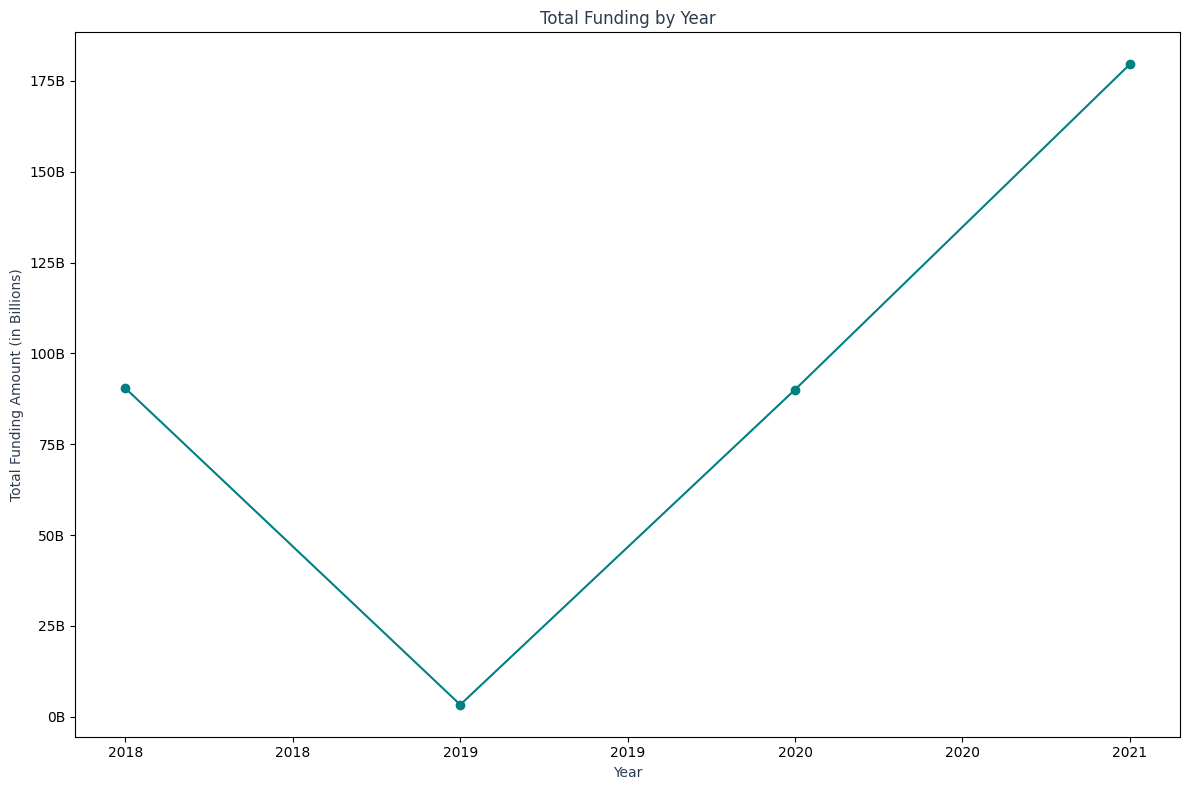

In [42]:
# Grouping data for total funding by year
funding_by_year = data.groupby('Fund_Year')['Amount'].sum()

# Converting amounts to billions
funding_by_year_billion = funding_by_year / 1e9

plt.figure(figsize=(12, 8))
plt.plot(funding_by_year_billion.index,
         funding_by_year_billion.values, marker='o', color='#008080')
plt.title('Total Funding by Year', color='#2E3B4E')
plt.xlabel('Year', color='#2E3B4E')
plt.ylabel('Total Funding Amount (in Billions)', color='#2E3B4E')
plt.grid(False)

# Formatting the y-axis to avoid scientific notation and display in billions
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda y, _: f'{y:,.0f}B'))
plt.gca().xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.tight_layout()
plt.show()

### Top sectors by funding

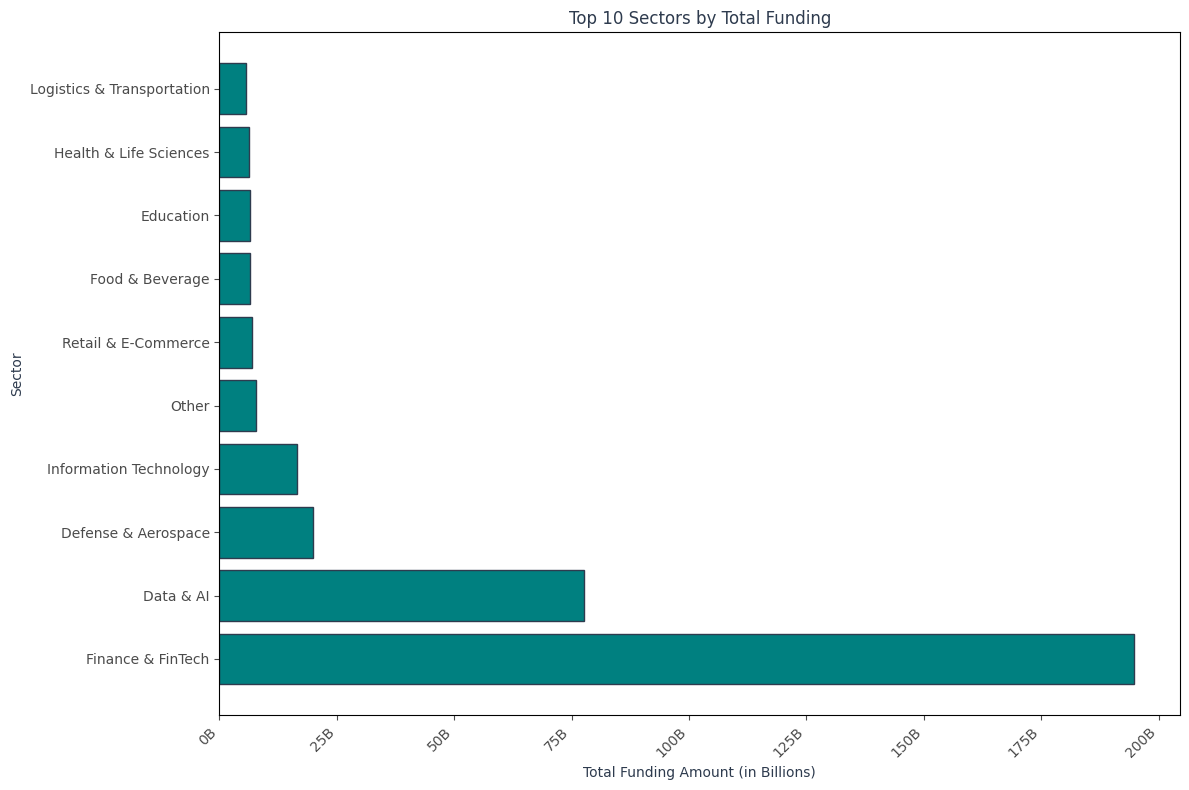

In [35]:
# Grouping data for top sectors
top_sectors = data.groupby('Sector_Group')[
    'Amount'].sum().sort_values(ascending=False).head(10)

# Converting amounts to billions
top_sectors_billion = top_sectors / 1e9

fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(top_sectors_billion.index, top_sectors_billion.values,
               color='#008080', edgecolor='#2E3B4E')
ax.set_title('Top 10 Sectors by Total Funding', color='#2E3B4E')
ax.set_xlabel('Total Funding Amount (in Billions)', color='#2E3B4E')
ax.set_ylabel('Sector', color='#2E3B4E')
ax.tick_params(axis='x', colors='#4B4B4B')
ax.tick_params(axis='y', colors='#4B4B4B')

# Formatting the x-axis to avoid scientific notation and display in billions
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}B'))

ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Top Locations by Total Funding

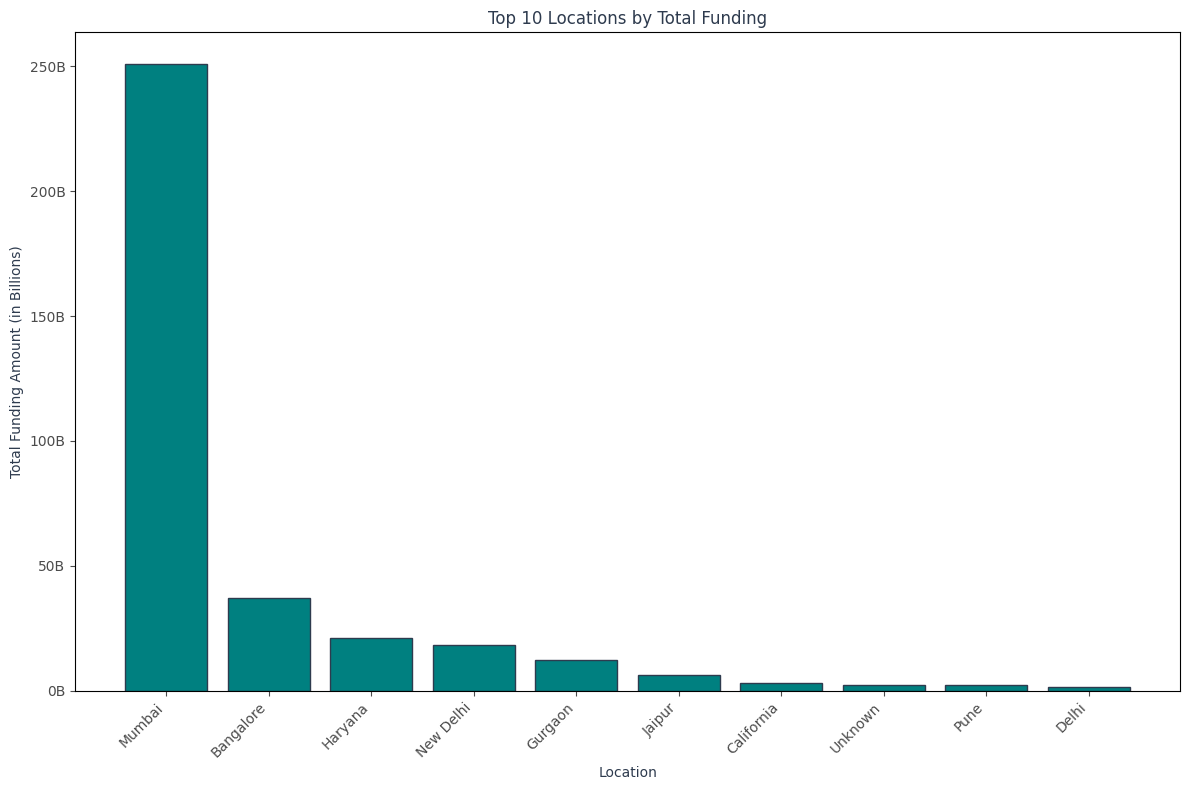

In [37]:
# Grouping data for top locations
top_locations = data.groupby('HeadQuarter')['Amount'].sum().sort_values(ascending=False).head(10)

# Converting amounts to billions
top_locations_billion = top_locations / 1e9

fig, ax = plt.subplots(figsize=(12, 8))  # Increased figure size for better readability
bars = ax.bar(top_locations_billion.index,
              top_locations_billion.values, color='#008080', edgecolor='#2E3B4E')
ax.set_title('Top 10 Locations by Total Funding', color='#2E3B4E')
ax.set_xlabel('Location', color='#2E3B4E')
ax.set_ylabel('Total Funding Amount (in Billions)', color='#2E3B4E')
ax.tick_params(axis='x', colors='#4B4B4B')
ax.tick_params(axis='y', colors='#4B4B4B')

# Formatting the y-axis to avoid scientific notation and display in billions
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:,.0f}B'))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Business Questions**

### 1. Which industries have received the most funding in each year, and how has this distribution changed over time? 

In [20]:
# Grouping the data by Fund_Year and Category, and sum the Amount for each group
funding_by_year_category = data.groupby(['Fund_Year', 'Category'])[
    'Amount'].sum().reset_index()

# Finding the category with the maximum funding for each year
max_funding_by_year = funding_by_year_category.loc[funding_by_year_category.groupby(
    'Fund_Year')['Amount'].idxmax()]

# Formatting the Amount column to not use scientific notation
max_funding_by_year['Amount'] = max_funding_by_year['Amount'].apply(lambda x: f"{
                                                                    x:,.0f}")

max_funding_by_year

,Fund_Year,Category,Amount
20,2018,technology,"43,247,875,645"
39,2019,technology,"1,484,450,500"
48,2020,e-commerce,"71,666,471,800"
74,2021,fintech,"154,305,430,000"


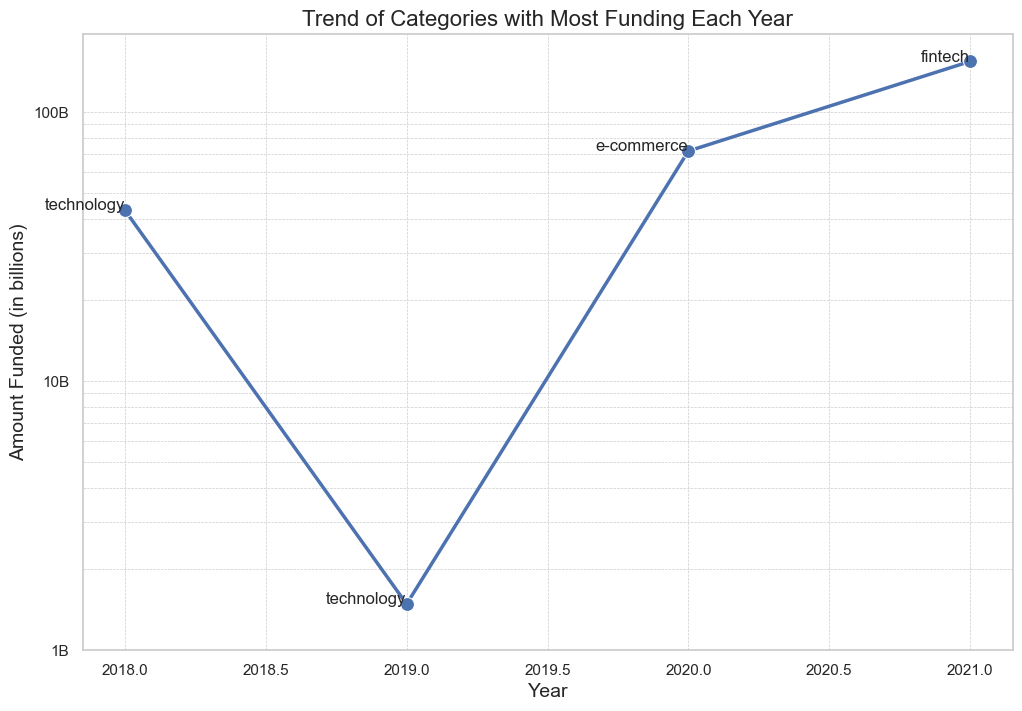

In [11]:
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=max_funding_by_year, x='Fund_Year', y='Amount',
             marker='o', linewidth=2.5, markersize=10)

# Annotate the points with the category names
for i in range(len(max_funding_by_year)):
    plt.text(max_funding_by_year['Fund_Year'].iloc[i], max_funding_by_year['Amount'].iloc[i],
             max_funding_by_year['Category'].iloc[i], fontsize=12, ha='right')

# Add titles and labels
plt.title('Trend of Categories with Most Funding Each Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount Funded (in billions)', fontsize=14)

# Adjust the y-axis scale and format
plt.yscale('log')
plt.yticks([1e9, 1e10, 1e11], ['1B', '10B', '100B'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

##### Key Observations

1. **2018**:
   - **Leading Category**: Technology
   - **Funding Amount**: $43.25 billion
   - Technology dominated the funding landscape in 2018, attracting the highest investment compared to other sectors.

2. **2019**:
   - **Leading Category**: Technology
   - **Funding Amount**: $1.48 billion
   - Technology continued to be the leading category in terms of funding, although the total amount was significantly lower than in 2018.

3. **2020**:
   - **Leading Category**: E-commerce
   - **Funding Amount**: $71.67 billion
   - E-commerce emerged as the most funded category in 2020, reflecting a shift in investor focus, possibly influenced by the global pandemic and increased online shopping activities.

4. **2021**:
   - **Leading Category**: Fintech
   - **Funding Amount**: $154.31 billion
   - Fintech saw a dramatic increase in funding, becoming the most funded category in 2021. This surge indicates a strong interest in financial technologies, likely driven by the growing demand for digital financial services.

##### Analysis
- **Trend Shift**: There is a noticeable shift in the dominant categories over the years. While technology was the leading category in 2018 and 2019, e-commerce took the lead in 2020, followed by fintech in 2021.
- **Investment Focus**: The changing categories highlight the evolving focus of investors, adapting to market demands and global events such as the COVID-19 pandemic.
- **Logarithmic Scale**: The use of a logarithmic scale on the y-axis allows for better visualization of the wide range of funding amounts, from billions to hundreds of billions, making the trend more comprehensible.




### 2.	What is the distribution of funding amounts among start-ups (e.g., average, median, and range) each year? 

In [40]:
# Calculate the distribution of funding amounts each year
funding_distribution = data.groupby('Fund_Year')['Amount'].agg(
    ['mean', 'median', 'min', 'max']).reset_index()
funding_distribution['range'] = funding_distribution['max'] - \
    funding_distribution['min']

# Format the columns to not use scientific notation
funding_distribution['mean'] = funding_distribution['mean'].apply(lambda x: f"{x:,.2f}")
funding_distribution['median'] = funding_distribution['median'].apply(lambda x: f"{x:,.0f}")
funding_distribution['min'] = funding_distribution['min'].apply(lambda x: f"{x:,.0f}")
funding_distribution['max'] = funding_distribution['max'].apply(lambda x: f"{x:,.0f}")
funding_distribution['range'] = funding_distribution['range'].apply(lambda x: f"{x:,.0f}")


funding_distribution

,Fund_Year,mean,median,min,max,range
0,2018,"172,200,688.55","1,400,000",0,"20,000,000,000","20,000,000,000"
1,2019,"37,488,013.48","5,500,000",0,"693,000,000","693,000,000"
2,2020,"85,595,835.17","1,400,000",0,"70,000,000,000","70,000,000,000"
3,2021,"150,899,769.75","2,500,000",0,"150,000,000,000","150,000,000,000"


#### Observations:
- **Increasing Mean Funding**: There was a significant increase in the mean funding amount from 2018 to 2021, with a notable dip in 2019. This could reflect larger, more ambitious funding rounds, especially in 2021.
- **Variable Median Funding**: The median funding amount fluctuates, suggesting varied investment sizes that might cater to both early-stage and mature start-ups.
- **Expanding Funding Range**: The range of funding dramatically increased in 2021, indicating a few extremely high-value investments during this year.


### 3. what are the average Funding Amounts for Different Funding Stages?

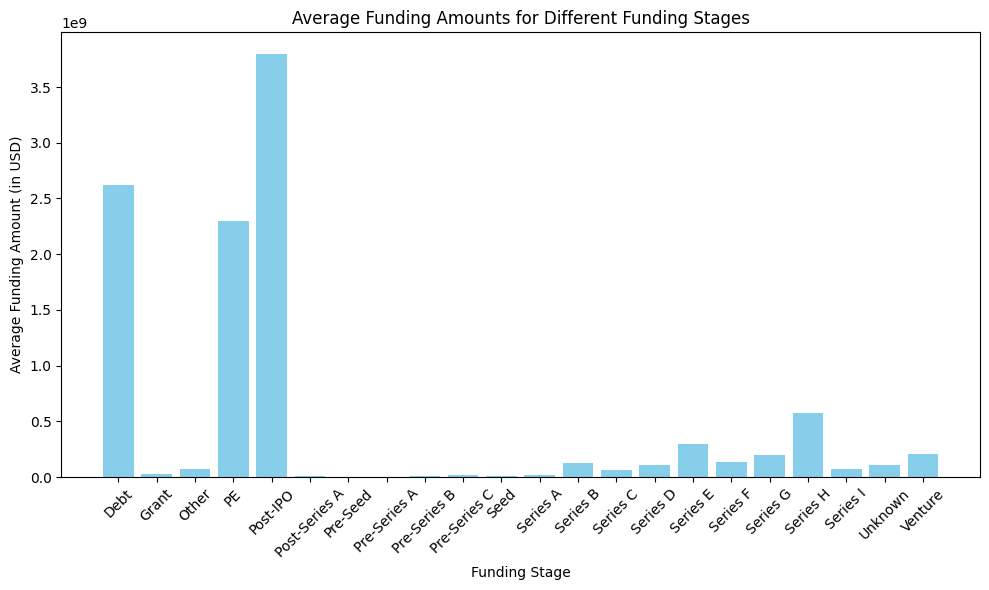

In [50]:
# Grouping by Stage and calculating the mean funding amount for each stage
average_funding_by_stage = df.groupby('Stage')['Amount'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(average_funding_by_stage['Stage'],
        average_funding_by_stage['Amount'], color='skyblue')
plt.xlabel('Funding Stage')
plt.ylabel('Average Funding Amount (in USD)')
plt.title('Average Funding Amounts for Different Funding Stages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Key Observations:
- **High Investments in IPO and Grants**: The 'IPO' stage shows the highest average funding, followed closely by 'Grant'. These stages indicate significant capital investments likely due to the scale and maturity of businesses reaching IPO or receiving substantial grants.
- **Private Equity and Debt Funding**: Both 'Private Equity (PE)' and 'Debt' funding stages also show considerable average funding amounts, suggesting strong financial support for start-ups in these stages.
- **Early and Middle Stages**: The 'Pre-Seed', 'Seed', and 'Series A' stages, although lower in comparison, still receive notable funding, essential for the early growth phases of start-ups.
- **Series Rounds Variation**: From 'Series B' onward, there is a drop in the average funding with fluctuations, peaking again at 'Series E'. This could reflect the varying success and growth potential perceived by investors in different rounds.


### 4. What are the average funding amounts for different funding stages (e.g., Seed, Series A, Series B, etc.) each year? 

<Figure size 1600x1000 with 0 Axes>

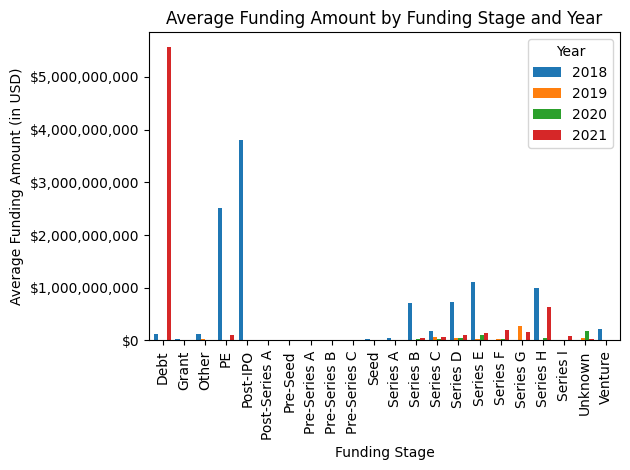

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Convert 'Fund_Year' and 'Amount' columns to numeric types
data['Fund_Year'] = pd.to_numeric(data['Fund_Year'])
data['Amount'] = pd.to_numeric(data['Amount'])

# Group by 'Stage' and 'Fund_Year' and calculate the average funding amount
average_funding = data.groupby(['Stage', 'Fund_Year'])['Amount'].mean()

# Create a bar chart
plt.figure(figsize=(16, 10))  # Adjust figsize for larger visual
colors = plt.cm.tab10.colors
average_funding.unstack().plot(kind='bar', color=colors,
                               width=0.8)  # Adjust width here

# Add labels and title
plt.xlabel('Funding Stage')
plt.ylabel('Average Funding Amount (in USD)')
plt.title('Average Funding Amount by Funding Stage and Year')

# Format y-axis ticks to avoid exponential notation
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# Show the plot
plt.legend(title='Year', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

#### Key Observations:
- **Debt and Grant Funding**: The highest average funding amounts are observed in the 'Debt' and 'Grant' categories for 2018, significantly higher than other stages and years. This might indicate large-scale funding initiatives or government grants that were prominent in that year.
- **Post-IPO**: A notable peak in 'Post-IPO' funding in 2019 suggests successful public offerings, which could correlate with increased market confidence or favorable economic conditions at that time.
- **Early-Stage Funding**: 'Pre-Seed' and 'Seed' stages show consistent investment across the years but at much lower scales compared to more mature stages. This consistency indicates a steady interest in early-stage start-ups.
- **Series Rounds**: Funding in the 'Series A' to 'Series H' stages shows variability, with 'Series A' and 'Series B' generally attracting more funding than later rounds, suggesting that investors may prefer to engage at these somewhat earlier stages of venture maturation.



### 5.	How does funding vary within the various geographical locations for start-ups?

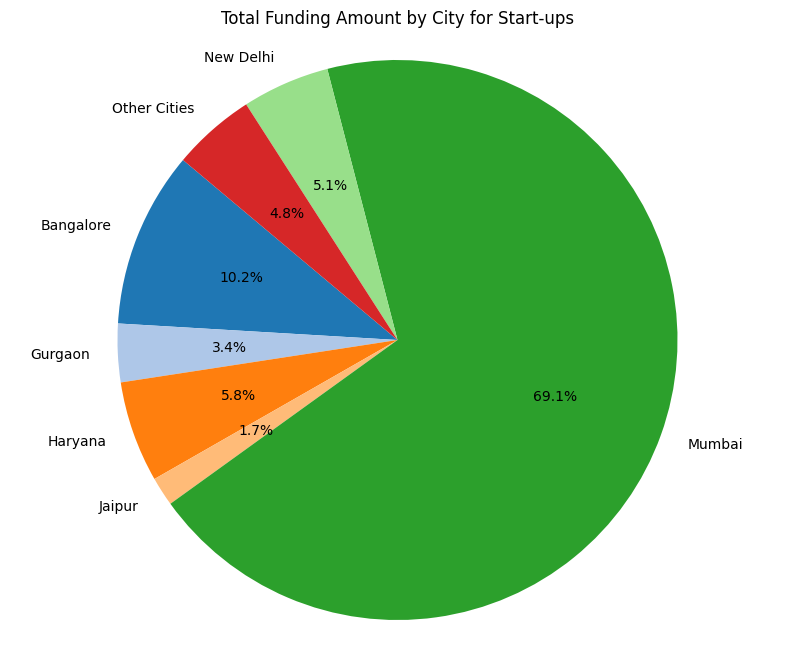

In [33]:
# Grouping by 'HeadQuarter' and summing the 'Amount'
funding_by_location = data.groupby('HeadQuarter')['Amount'].sum().reset_index()

# Calculating the total funding
total_funding = funding_by_location['Amount'].sum()

# Determining the percentage contribution of each city
funding_by_location['Percentage'] = (funding_by_location['Amount'] / total_funding) * 100

# Separating cities with more than 1% funding
significant_cities = funding_by_location[funding_by_location['Percentage'] > 1]
other_cities = funding_by_location[funding_by_location['Percentage'] <= 1]

# Summing up the funding for other cities
other_cities_funding = other_cities['Amount'].sum()
other_cities_percentage = other_cities['Percentage'].sum()

# Adding 'Other Cities' to the significant cities dataframe
other_cities_row = pd.DataFrame({'HeadQuarter': ['Other Cities'], 'Amount': [other_cities_funding], 'Percentage': [other_cities_percentage]})
significant_cities = pd.concat([significant_cities, other_cities_row], ignore_index=True)

# Using a seaborn color palette
colors = sns.color_palette('tab20', len(significant_cities))

# Plotting
plt.figure(figsize=(10, 8))
plt.pie(significant_cities['Amount'], labels=significant_cities['HeadQuarter'],
        autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Total Funding Amount by City for Start-ups')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


#### Observations:
- **Mumbai** stands out as the leading city in terms of start-up funding, receiving a substantial 69.1% of the total funding. This indicates a significant concentration of investment activities in Mumbai compared to other cities.
- **Bangalore**, known for its vibrant tech start-up community, follows with 10.2% of the funding. While substantial, it's notably lower than Mumbai, suggesting differing investor focus and possibly the sectors they invest in.
- **New Delhi** and **Gurgaon**, key players in the Northern India start-up scene, collectively account for around 8.2% of the funding, highlighting their roles but also suggesting room for growth compared to their southern counterparts.
- **Other Cities** together make up 11.6% of the total funding, indicating that while the majority of funds are concentrated in major cities, there is a spread across the country, supporting smaller hubs and diverse start-up ventures.

